In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [103]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

print('Train shape', train.shape)
print('Test shape', test.shape)

Train shape (891, 12)
Test shape (418, 11)


## Explore Data

- survival: Survival
- pclass: Ticket class ( 1 = 1st, 2 = 2nd, 3 = 3rd)
- sex
- Age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [104]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Drop cabin, passagerId and Ticket

In [106]:
train = train.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1)
test = test.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1)



The Age, Cabin, and Embarked fields contain null values, with the cabin column having the most missing data.

<Axes: ylabel='Frequency'>

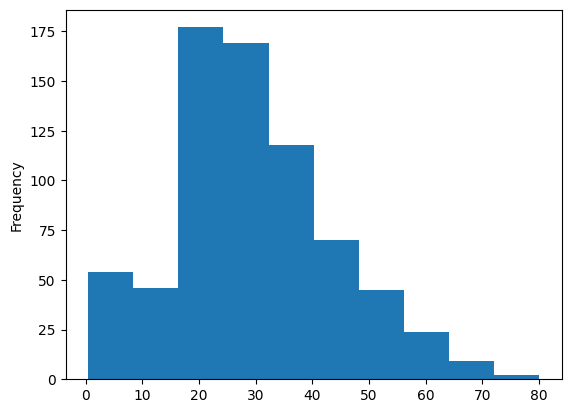

In [107]:
train['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

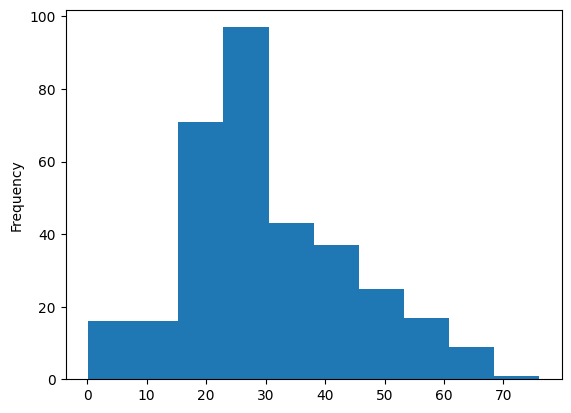

In [108]:
test['Age'].plot(kind='hist')

In [109]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

## Explore Data

### Survived Rate

In [110]:
from numpy._core.defchararray import count
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]

count_survived = len(survived)
count_died = len(died)


print('Survived', count_survived)
print('Died', count_died)

print('Survived %',round((count_survived / (count_survived + count_died)) * 100))
print('Died %', round((count_died / (count_survived + count_died)) * 100))

Survived 342
Died 549
Survived % 38
Died % 62


### Sex Survived Rate

In [111]:
female_survived = len(survived[survived['Sex'] == 'female'])
male_survived = len(survived[survived['Sex'] == 'male'])

print('Female survived', female_survived)
print('Male survived', male_survived)

print('Female survived %', round((female_survived / (female_survived + male_survived)) * 100))
print('Male survived %', round((male_survived / (female_survived + male_survived)) * 100))

Female survived 233
Male survived 109
Female survived % 68
Male survived % 32


### Pclass vs Survived

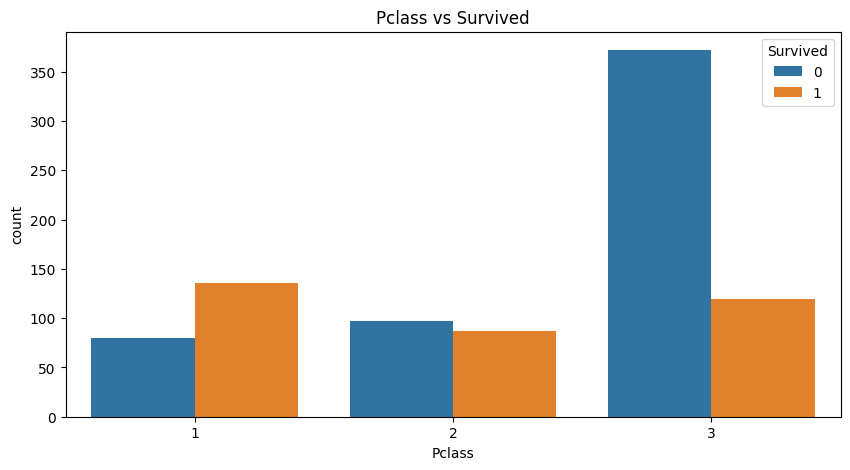

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', data=train, hue='Survived')
plt.title('Pclass vs Survived')
plt.show()

### SibSp vs Survived

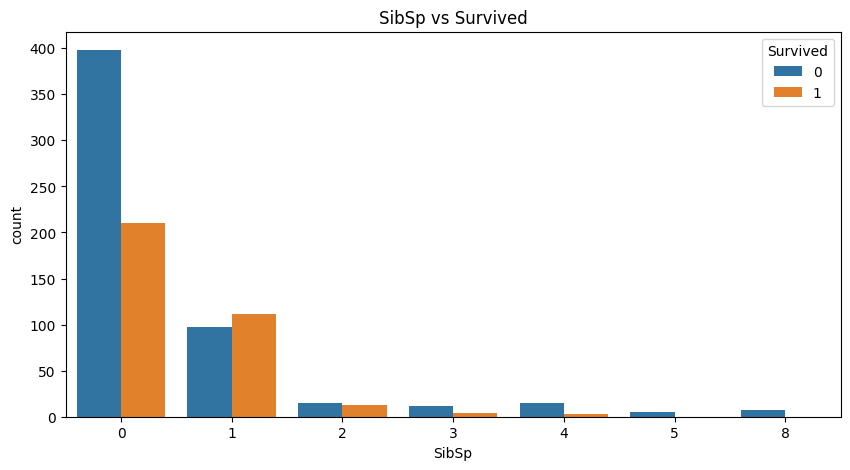

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp', data=train, hue='Survived')
plt.title('SibSp vs Survived')
plt.show()

### Parch vs Survived

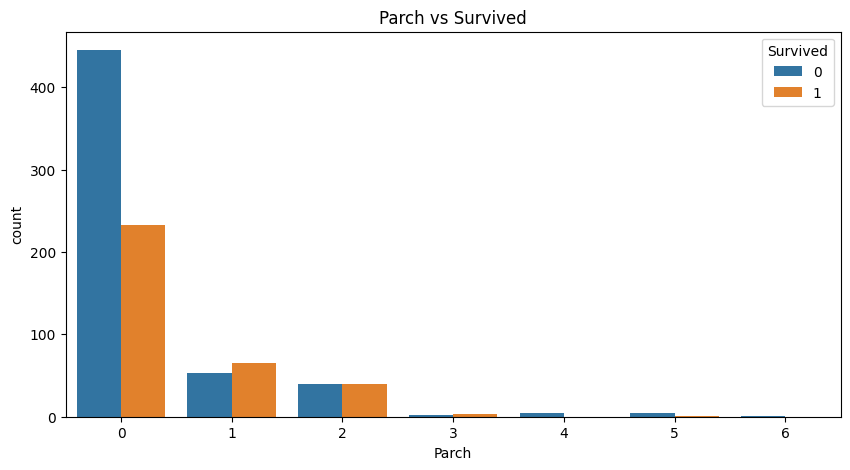

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x='Parch', data=train, hue='Survived')
plt.title('Parch vs Survived')
plt.show()

### Fare Analisys

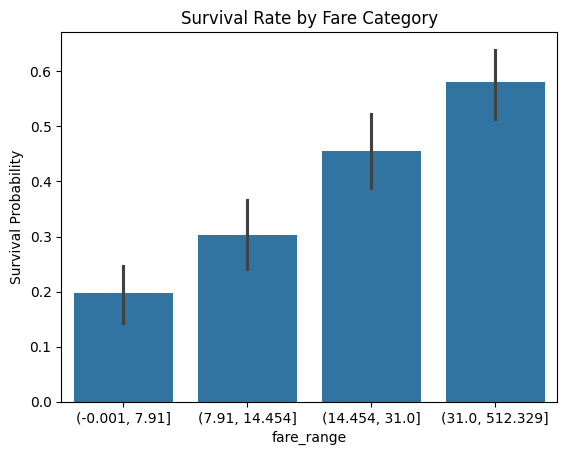

In [115]:
df = train.copy()
df['fare_range'] = pd.qcut(df['Fare'], 4)
sns.barplot(x='fare_range', y='Survived', data=df)
plt.title('Survival Rate by Fare Category')
plt.ylabel('Survival Probability')
plt.show()

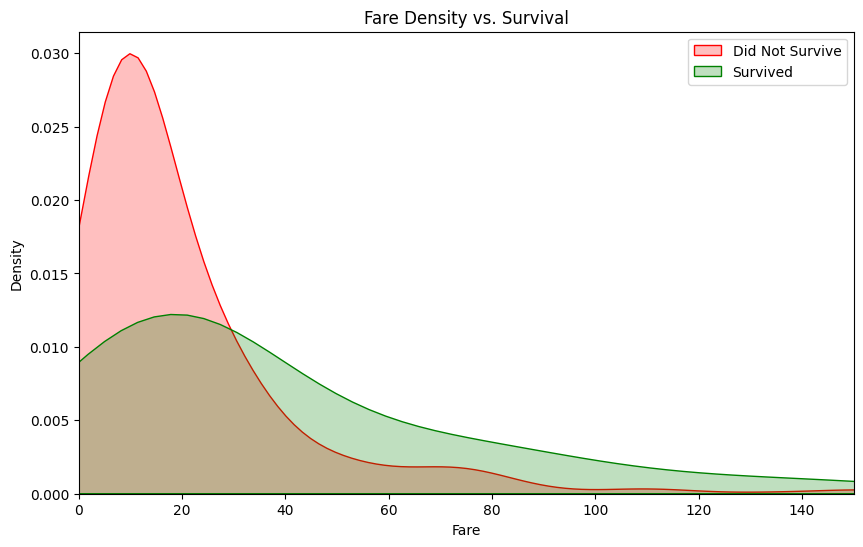

In [116]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 0]['Fare'], label='Did Not Survive', fill=True, color='red')
sns.kdeplot(df[df['Survived'] == 1]['Fare'], label='Survived', fill=True, color='green')

plt.xlim(0, 150)
plt.title('Fare Density vs. Survival')
plt.xlabel('Fare')
plt.legend()
plt.show()

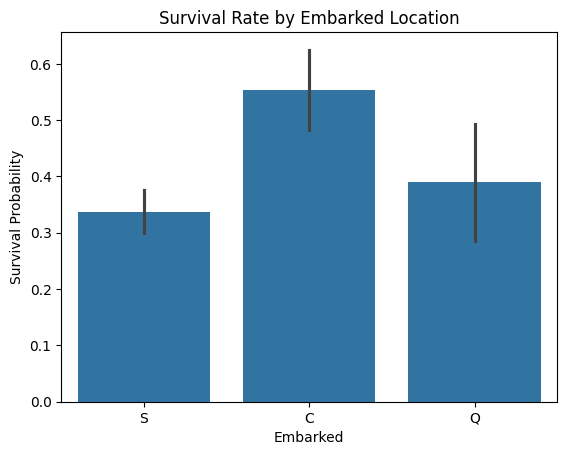

In [117]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarked Location')
plt.ylabel('Survival Probability')
plt.show()

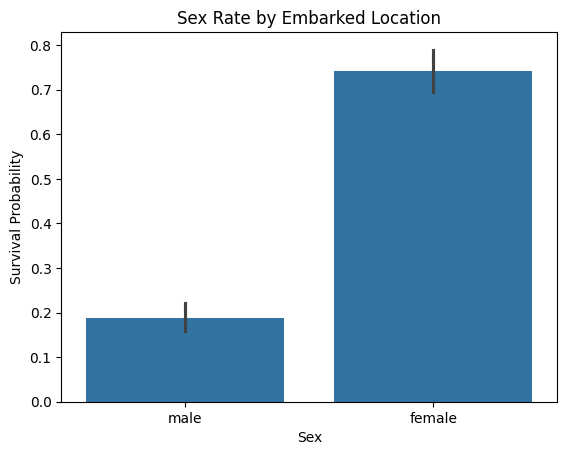

In [118]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Sex Rate by Embarked Location')
plt.ylabel('Survival Probability')
plt.show()

In [119]:
gender_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(gender_mapping)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [120]:
train = pd.get_dummies(train, columns=['Embarked'], drop_first=False, dtype=int)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,1


In [121]:
train = train.drop(['Name'], axis=1)
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


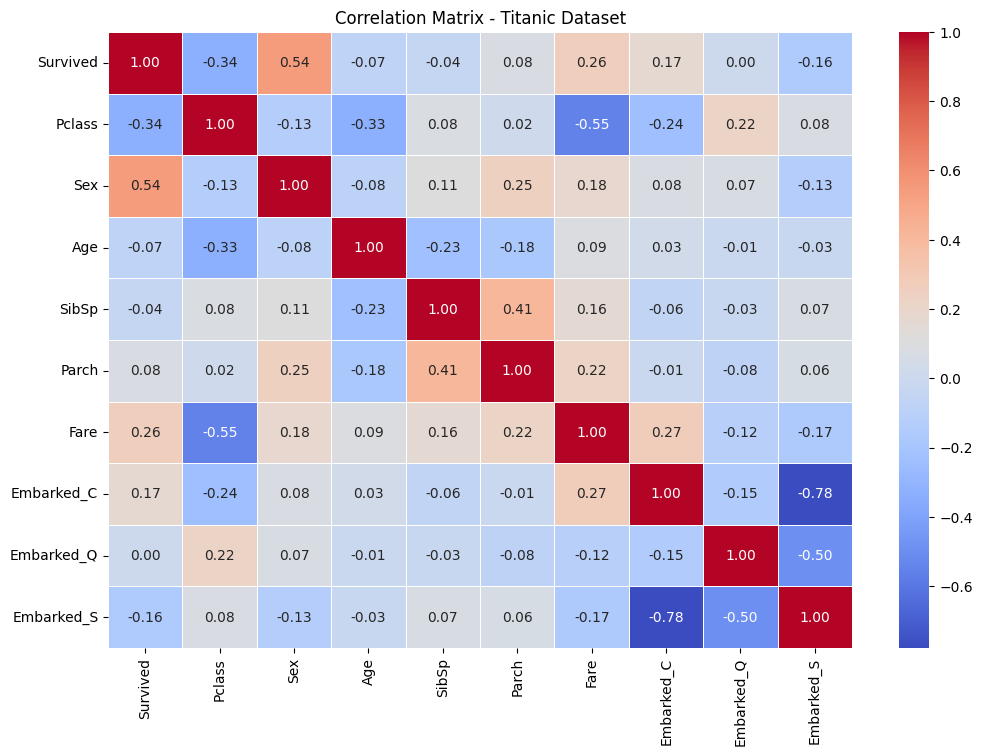

In [122]:
numeric_df = train.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix - Titanic Dataset')
plt.show()

## Train Model

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Define Features and split data into training and validating dataset

In [124]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logist Regression

In [125]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
predictions = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy Score: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

predictions_scaled = model_scaled.predict(X_test_scaled)
print(f"Accuracy with Scaling: {accuracy_score(y_test, predictions_scaled):.4f}")

Accuracy with Scaling: 0.8101


### Decision Tree

In [131]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, tree_preds):.4f}")
print("\n Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("\n Decision Tree Classification Report:\n", classification_report(y_test, tree_preds))

Decision Tree Accuracy: 0.7989

 Decision Tree Confusion Matrix:
 [[92 13]
 [23 51]]

 Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



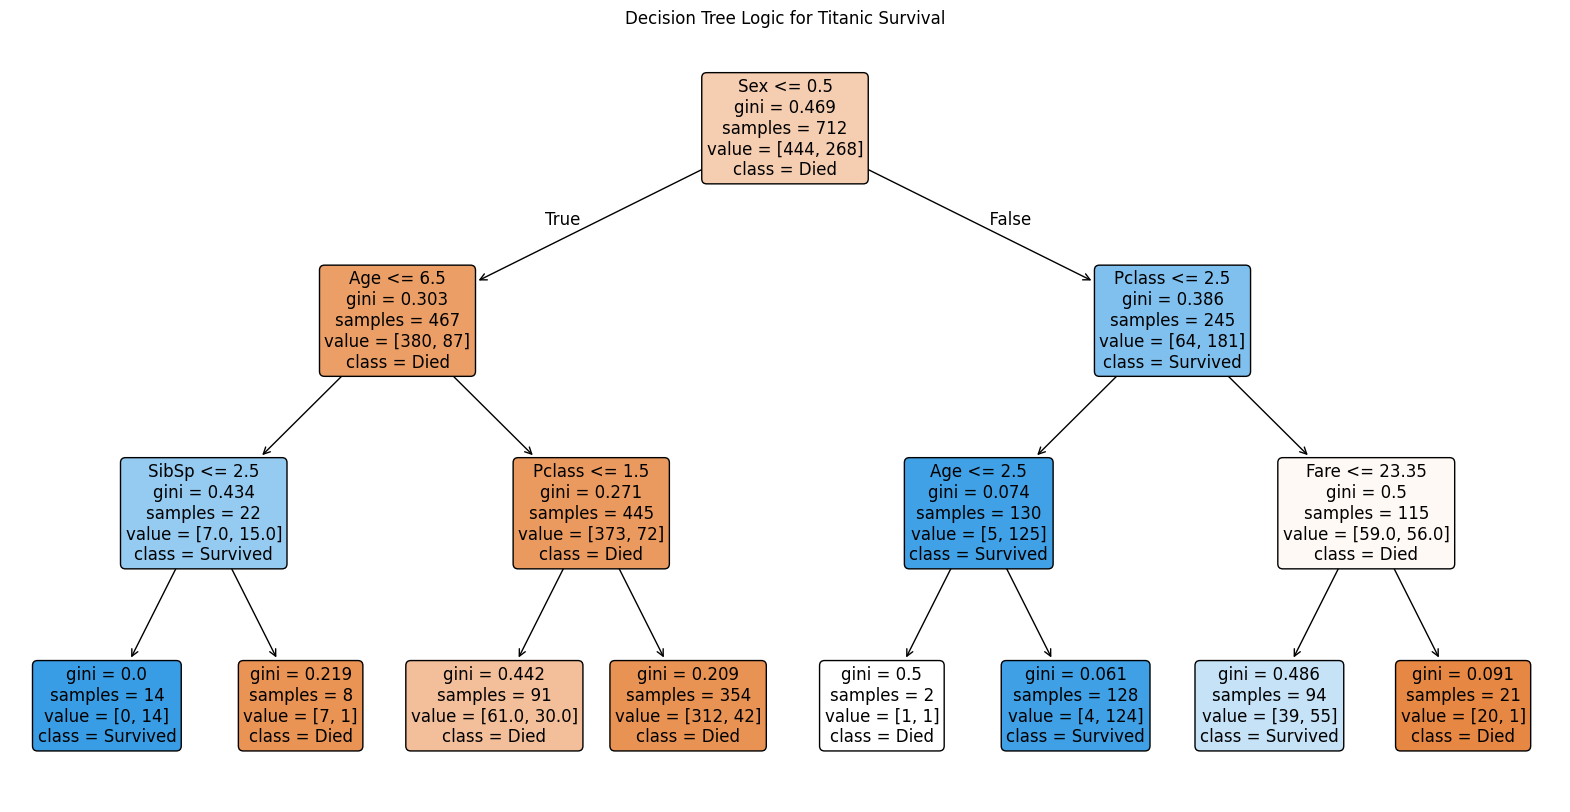

In [132]:
plt.figure(figsize=(20,10))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Logic for Titanic Survival")
plt.show()

### Random Forest

In [138]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print("\n Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("\n Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.8156

 Random Forest Confusion Matrix:
 [[95 10]
 [23 51]]

 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



### XGBOOST

In [141]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_preds):.4f}")
print("\n XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("\n XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.8212

 XGBoost Confusion Matrix:
 [[94 11]
 [21 53]]

 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

